# Capstone Analysis

Jonathan Marin, Jason Lin, John Santerre

# Import Python Packages

In [1]:
import pandas as pd  
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectFromModel



# Data Preparation

We are preparing two different sets of data.  Gene counts and gene concentration data.  For the gene counts, we only have data for PA.  This is the dataset that was used for the initial study.  For the gene concentration (Data Set 2) we have PA and UAB data which we have to normalize. 

# Data Set 1 - RNA Sequence Count Data

The below code imports the rna sequence count spreadsheet and normalizes the data using the EdgeR package.  Stanford researchers did statistical tests for feature signficance, but we will do something else to choose features.  I will comment out the code for the statistical tests that they did and normalize the entire dataset. 

Also, the data is pivoted in such a way that it isn't useful for machine learning.  We will have to pivot the data for our purposes. 

In [2]:
#python dataframe
rawdata_norm_labels = pd.read_csv('rawdata_norm_labels.csv', nrows = None)

In [3]:
rawdata_norm_labels = rawdata_norm_labels.rename(index=str, columns = {"rawdata$external_gene_name":"Gene_Name"})

In [4]:
rawdata_norm_labels

,Gene_Name,T_Penn_3,T_Penn_6,T_Penn_8,T_Penn_9,T_Penn_14,T_Penn_16,T_Penn_27,PT_Penn_15,PT_Penn_17,PT_Penn_18,PT_Penn_24,PT_Penn_25,PT_Penn_28,PT_Penn_4,PT_Penn_10
0,RP11-460H9.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,C2orf76,0.000000,4.014262,0.000000,2.926681,0.000000,8.746643,0.000000,0.000000,0.000000,2.468740,0.000000,1.218791,0.000000,11.771215,3.025604
2,ACTL10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,CEP135,13.864722,41.748323,33.364752,45.363552,21.181704,76.220750,16.504101,46.756871,57.996230,71.593448,11.338254,32.907366,54.647795,23.542429,46.728768
4,AC005609.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,RP11-613M10.6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,NDUFB5P1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,MIIP,0.000000,12.042786,16.682376,23.413446,30.595794,8.746643,33.008203,3.596682,7.249529,9.874958,11.338254,39.001322,0.000000,0.000000,11.430058
8,RP11-578O24.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,PRSS3P4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [5]:
#transposed_rawdata_norm.set_index('Gene_Name',inplace=True)

transposed_rawdata_norm = rawdata_norm_labels.transpose()

In [6]:
transposed_rawdata_norm

,0,1,2,3,4,5,6,7,8,9,...,59407,59408,59409,59410,59411,59412,59413,59414,59415,59416
Gene_Name,RP11-460H9.1,C2orf76,ACTL10,CEP135,AC005609.2,RP11-613M10.6,NDUFB5P1,MIIP,RP11-578O24.2,PRSS3P4,...,CLN6,RP11-500C11.3,CTBP2P7,ITIH2,RBPMSLP,ABCA8,RNU6-280P,PRAMEF7,RNU6-545P,RNU6-318P
T_Penn_3,0,0,0,13.8647,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
T_Penn_6,0,4.01426,0,41.7483,0,0,0,12.0428,0,0,...,8.02852,0,0,0,0,0,0,0,0,0
T_Penn_8,0,0,0,33.3648,0,0,0,16.6824,0,0,...,0,0,0,0,0,0,0,0,0,0
T_Penn_9,0,2.92668,0,45.3636,0,0,0,23.4134,0,0,...,0,0,1.46334,0,0,0,0,0,0,0
T_Penn_14,0,0,0,21.1817,0,0,0,30.5958,0,0,...,7.06057,0,0,0,0,0,0,0,0,0
T_Penn_16,0,8.74664,0,76.2208,0,0,0,8.74664,0,0,...,8.74664,0,0,0,0,0,0,0,0,0
T_Penn_27,0,0,0,16.5041,0,0,0,33.0082,0,0,...,0,0,0,0,0,0,0,0,0,0
PT_Penn_15,0,0,0,46.7569,0,0,0,3.59668,0,0,...,0,0,0,0,0,0,0,0,0,0
PT_Penn_17,0,0,0,57.9962,0,0,0,7.24953,0,0,...,16.9156,0,0,0,0,0,0,0,0,0


In [7]:
transposed_rawdata_norm.columns = transposed_rawdata_norm.iloc[0]

In [8]:
transposed_rawdata_norm = transposed_rawdata_norm.drop(transposed_rawdata_norm.index[0])

In [9]:
transposed_rawdata_norm.columns[0]

'RP11-460H9.1'

In [10]:
transposed_rawdata_norm['index'] = transposed_rawdata_norm.index

In [11]:
transposed_rawdata_norm = transposed_rawdata_norm.reset_index(drop = False)

In [12]:
transposed_rawdata_norm.index.names = ['index']

In [13]:
transposed_rawdata_norm =transposed_rawdata_norm.rename(index=str, columns={"level_0": "Patient"})

In [14]:
transposed_rawdata_norm.to_csv('transposed_rawdata_norm.csv', index = False)

In [15]:
transposed_rawdata_norm['preterm_ind'] = np.where(transposed_rawdata_norm['Patient'].str.contains("PT") == True, 1, 0)

In [16]:
transposed_rawdata_norm.reset_index(drop = True)

Gene_Name,Patient,RP11-460H9.1,C2orf76,ACTL10,CEP135,AC005609.2,RP11-613M10.6,NDUFB5P1,MIIP,RP11-578O24.2,...,CTBP2P7,ITIH2,RBPMSLP,ABCA8,RNU6-280P,PRAMEF7,RNU6-545P,RNU6-318P,index,preterm_ind
0,T_Penn_3,0,0,0,13.8647,0,0,0,0,0,...,0,0,0,0,0,0,0,0,T_Penn_3,0
1,T_Penn_6,0,4.01426,0,41.7483,0,0,0,12.0428,0,...,0,0,0,0,0,0,0,0,T_Penn_6,0
2,T_Penn_8,0,0,0,33.3648,0,0,0,16.6824,0,...,0,0,0,0,0,0,0,0,T_Penn_8,0
3,T_Penn_9,0,2.92668,0,45.3636,0,0,0,23.4134,0,...,1.46334,0,0,0,0,0,0,0,T_Penn_9,0
4,T_Penn_14,0,0,0,21.1817,0,0,0,30.5958,0,...,0,0,0,0,0,0,0,0,T_Penn_14,0
5,T_Penn_16,0,8.74664,0,76.2208,0,0,0,8.74664,0,...,0,0,0,0,0,0,0,0,T_Penn_16,0
6,T_Penn_27,0,0,0,16.5041,0,0,0,33.0082,0,...,0,0,0,0,0,0,0,0,T_Penn_27,0
7,PT_Penn_15,0,0,0,46.7569,0,0,0,3.59668,0,...,0,0,0,0,0,0,0,0,PT_Penn_15,1
8,PT_Penn_17,0,0,0,57.9962,0,0,0,7.24953,0,...,0,0,0,0,0,0,0,0,PT_Penn_17,1
9,PT_Penn_18,0,2.46874,0,71.5934,0,0,0,9.87496,0,...,0,2.46874,0,0,0,0,0,0,PT_Penn_18,1


In [17]:
X1 = transposed_rawdata_norm.drop(['preterm_ind','Patient','index'], axis = 1)

In [18]:
X1.to_csv('Transformed_X_Data.csv',  header = True, index = False, index_label = None)

In [19]:
X1 = pd.read_csv('Transformed_X_Data.csv')

In [20]:
y1 = transposed_rawdata_norm['preterm_ind']

# Data 1 - RNA Seq Count Data - Feature Importance


In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import RandomizedSearchCV


C:\Users\sams\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [22]:
model = ExtraTreesClassifier()

In [23]:
model = model.fit(X1,y1)

In [24]:
sfm = SelectFromModel(model, prefit = True, threshold= '.5*mean')
n_features = sfm.transform(X1).shape[1]
print('Number of feature selected:')
print(n_features)



Number of feature selected:
32


Current size: [6.0, 4.0]


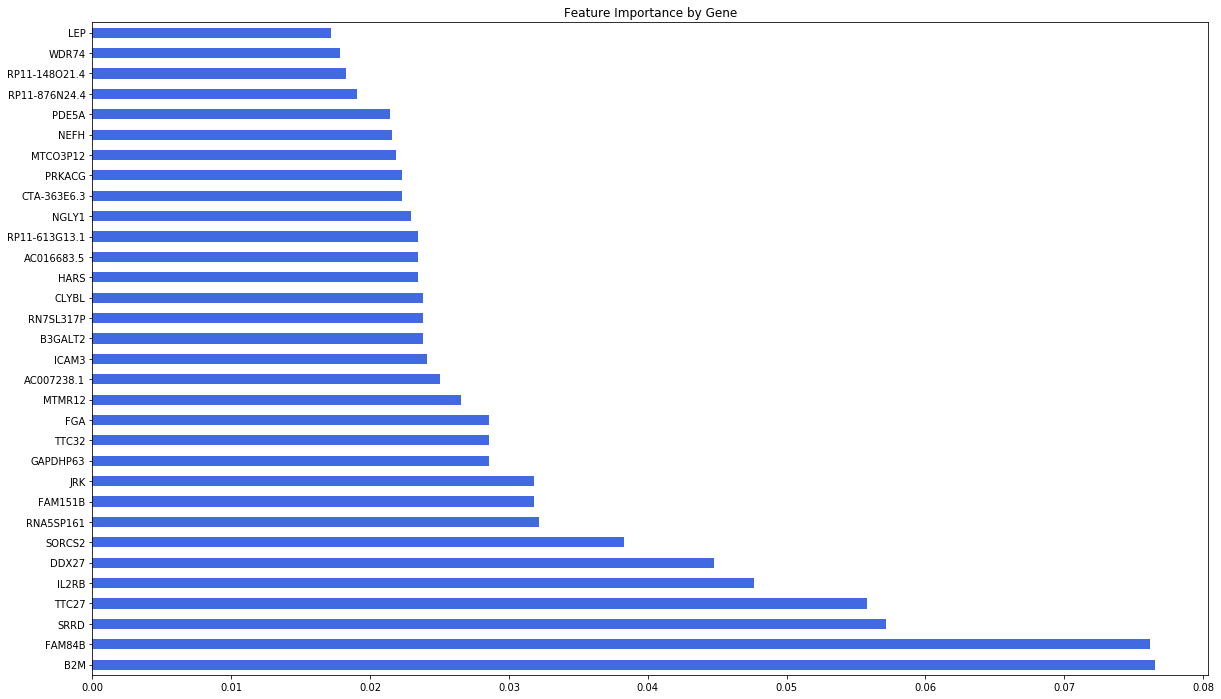

In [25]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 20
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size


(pd.Series(model.feature_importances_, index=X1.columns)
   .nlargest(n_features)
   .plot(kind='barh', title = 'Feature Importance by Gene',color="royalblue"))

In [26]:
#ft = list(zip(X1.columns, sfm.get_support()))

#selected = [x[0] for x in ft if x[1] == True]

#X_selected = X1[selected]

In [27]:
#X1 = X_selected

In [28]:
#X1.shape

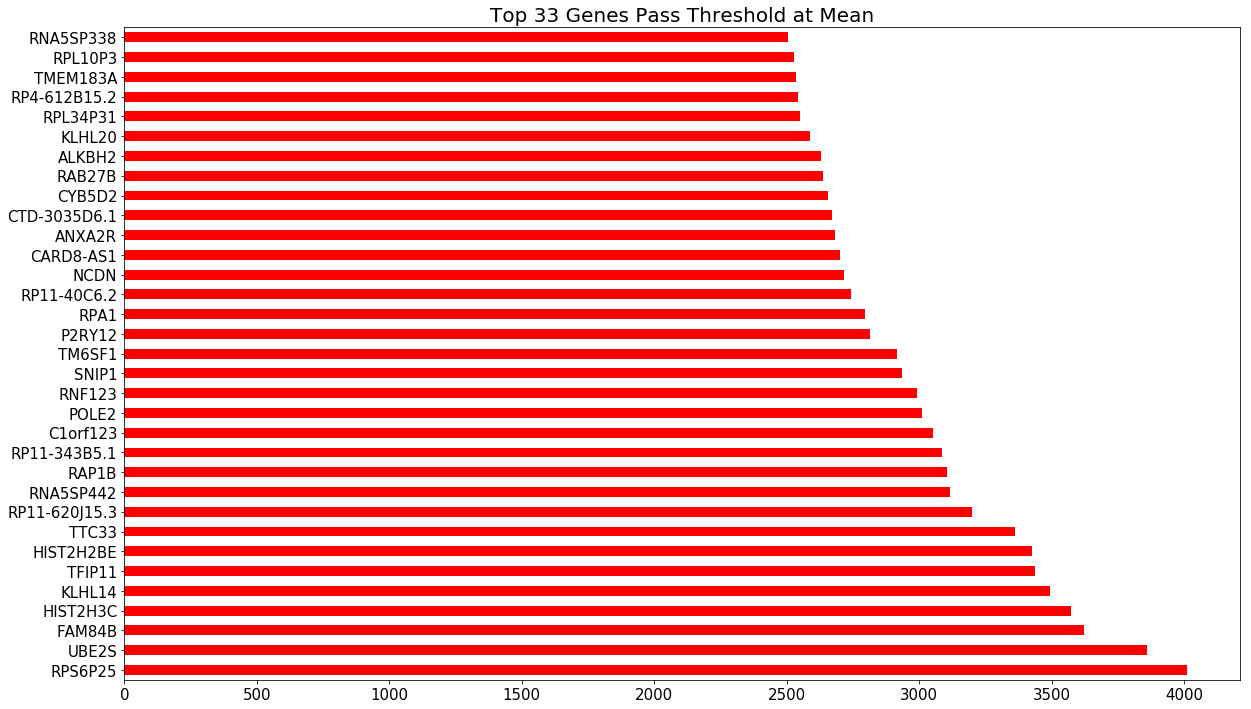

In [29]:
base = pd.Series(0,X1.columns)

for i in range(100000):
    model = ExtraTreesClassifier()
    model = model.fit(X1,y1)
    sfm = SelectFromModel(model, prefit = True)
    n_features = sfm.transform(X1).shape[1]
    order_features = pd.Series(model.feature_importances_, index=X1.columns).nlargest(n_features)
    #print(order_features)
    #print(n_features)
    Name_features=pd.Series(1, index=order_features.index)
    #print(Name_features)
    if i ==0:
        testuse = base.add(Name_features,fill_value=0)
        numFeaturesuse = n_features
        #print(test)
    else:
        testuse = testuse.add(Name_features,fill_value = 0)
        numFeaturesuse = numFeaturesuse + n_features

#print(test/1000)
avgnumuse=int(numFeaturesuse/100000)

testuse.nlargest(avgnumuse).plot(kind='barh', title = 'Top %i Genes Pass Threshold at Mean'%avgnumuse,color="red",rot=0, fontsize =15).title.set_size(20)

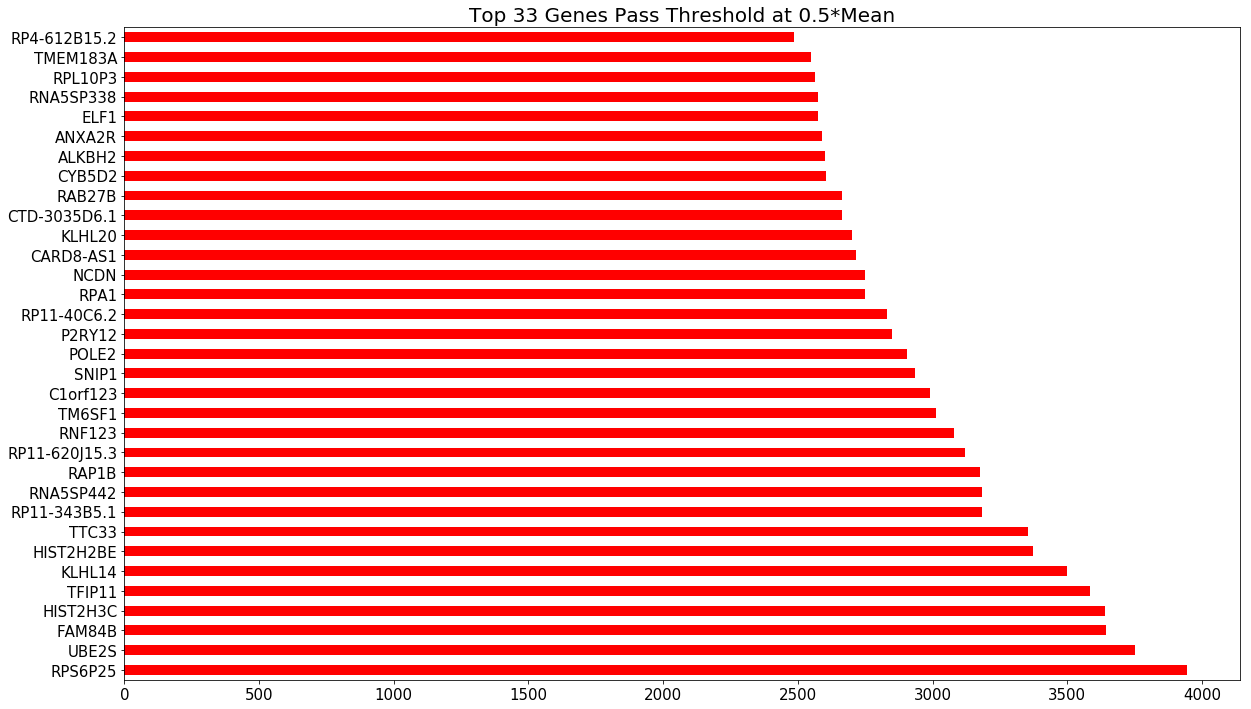

In [30]:
base = pd.Series(0,X1.columns)

for i in range(100000):
    model = ExtraTreesClassifier()
    model = model.fit(X1,y1)
    sfm = SelectFromModel(model, prefit = True, threshold= '0.5*mean')
    n_features = sfm.transform(X1).shape[1]
    #print('Number of feature selected:')
    #print(n_features)
    order_features = pd.Series(model.feature_importances_, index=X1.columns).nlargest(n_features)
    #print(order_features)
    Name_features=pd.Series(1, index=order_features.index)
    
    if i ==0:
        test = base.add(Name_features,fill_value=0)
        numFeatures = n_features
    else:
        test = test.add(Name_features,fill_value = 0)
        numFeatures = numFeatures + n_features

#print(test/1000)
avgnum=int(numFeatures/100000)
test.nlargest(avgnum).plot(kind='barh', title = 'Top %i Genes Pass Threshold at 0.5*Mean'%avgnum,color="red",rot=0, fontsize =15).title.set_size(20)

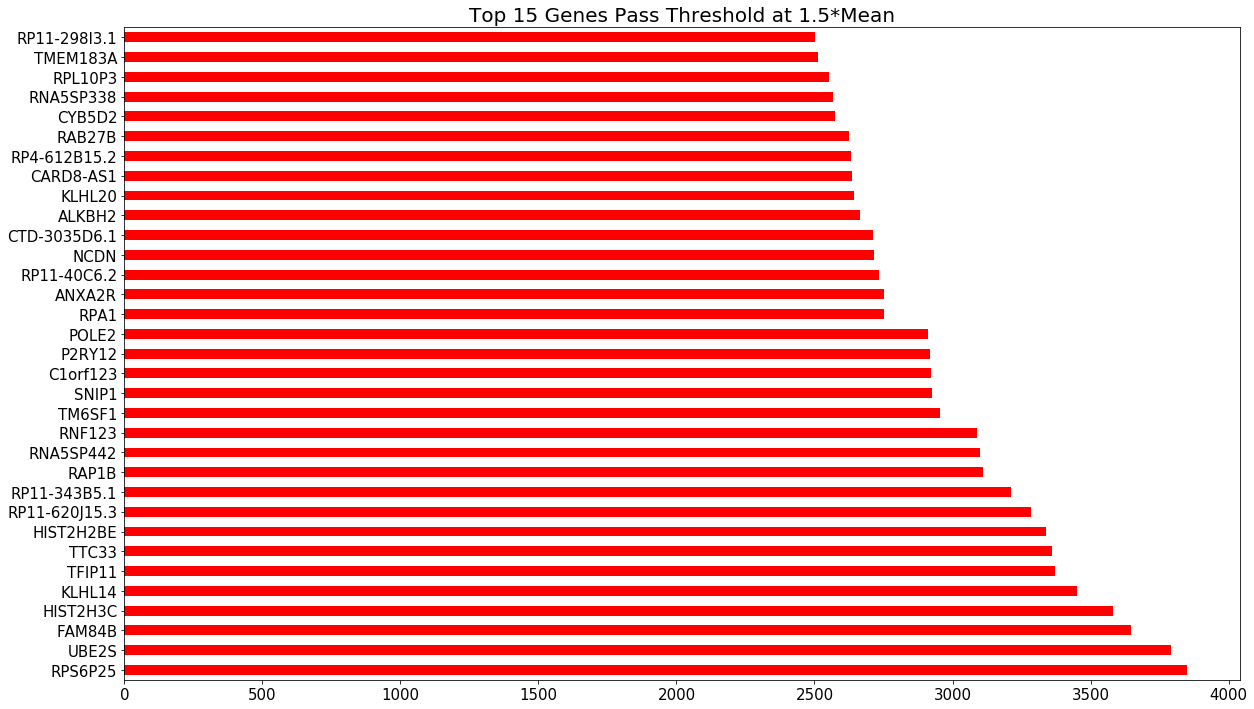

In [31]:
base = pd.Series(0,X1.columns)

for i in range(100000):
    model = ExtraTreesClassifier()
    model = model.fit(X1,y1)
    sfm = SelectFromModel(model, prefit = True, threshold= '1.5*mean')
    n_features = sfm.transform(X1).shape[1]
    #print('Number of feature selected:')
    #print(n_features)
    order_features = pd.Series(model.feature_importances_, index=X1.columns).nlargest(n_features)
    #print(order_features)
    Name_features=pd.Series(1, index=order_features.index)
    
    if i ==0:
        test = base.add(Name_features,fill_value=0)
        numFeatures = n_features
    else:
        test = test.add(Name_features,fill_value = 0)
        numFeatures = numFeatures + n_features

#print(test/1000)
avgnum=int(numFeatures/100000)
test.nlargest(avgnum).plot(kind='barh', title = 'Top 15 Genes Pass Threshold at 1.5*Mean',color="red",rot=0, fontsize =15).title.set_size(20)

# Correlation Plot

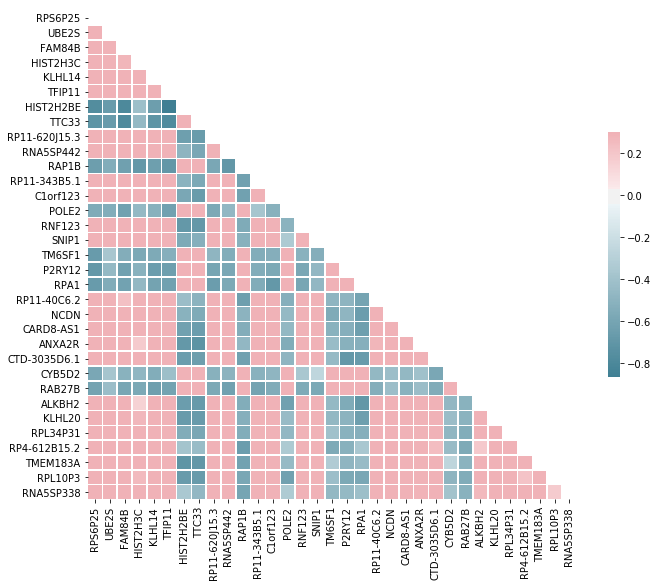

In [34]:
chosenFeat=list(testuse.nlargest(avgnumuse).index)
X_corr = X1[chosenFeat]

corr = X_corr.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Stratified Shuffle Split

In [35]:
from sklearn.model_selection import StratifiedShuffleSplit 

#Train test split that was used before
#X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.20, random_state=42)
cv = StratifiedShuffleSplit(n_splits = 10, test_size = .2, random_state = 42)


The target in the training data seems to be balanced. 

# Grid Search - Decision Tree - Data 1 - RNA Seq Count Data

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree

chosenFeat=list(testuse.nlargest(avgnumuse).index)
X_test = X1[chosenFeat]


dtc = DecisionTreeClassifier(random_state = 1234)

param_grid = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                  'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

grid = GridSearchCV(dtc, param_grid = param_grid, cv = cv, scoring = 'accuracy')

grid.fit(X_test, y1)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))



The best parameters are {'max_depth': 2, 'max_features': 3} with a score of 0.90


# Grid Search - Random Forest - Data 1

In [37]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier


rf = RandomForestClassifier(random_state = 1234)

param_grid = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                  'max_features': ['auto','sqrt'],
              'min_samples_leaf': [1,2,3,4],
               'min_samples_split': [2,5,10], 
               'n_estimators': [1,2,3,4,5,6,7,8,9,10]}

grid = GridSearchCV(rf, param_grid = param_grid, cv = cv, scoring = 'accuracy')

grid.fit(X_test, y1)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))


The best parameters are {'max_depth': 1, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 9} with a score of 0.97


# Grid Search- K Nearest Neighbors - Data1

In [38]:
from sklearn.neighbors import KNeighborsClassifier


param_grid = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10],
              'weights': ['uniform','distance'],
                'leaf_size': [1,2,3,5,10,20,30,50,100]}

#Create KNN Classifier
knn = KNeighborsClassifier()



grid = GridSearchCV(knn, param_grid = param_grid, cv = cv, scoring = 'accuracy')

grid.fit(X_test, y1)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

The best parameters are {'leaf_size': 1, 'n_neighbors': 1, 'weights': 'uniform'} with a score of 0.87


# Data 2  Stratified Shuffle Split Grid Search

## Data Import

In [78]:
data2 = pd.read_csv("counts_per_ml_PA_UAB.csv")

There are columns with nothing but NaNs.  Going to drop these columns. 

In [79]:
data2 = data2.dropna(axis =1, how = 'all')

In [80]:
data2['preterm_ind'] =  np.where(data2['delivery'] >= 37, 0, 1)

In [81]:
data2 = data2.drop(['sample_number', 'sample_id', 'panel'], axis = 1)  ##don't need sample number nor sample_id

In [82]:
PENN = ['PT_Penn', 'T_Penn']

In [83]:
UAB = ['PT_UAB','T_UAB']

In [84]:
X2 = data2

Here we are creating a regressor and a classifier for the target

In [85]:
y2_train_regressor = X2['delivery']
y2_train_classifier = X2['preterm_ind']

X2 = data2.drop(['delivery', 'preterm_ind','cohort','ga','dCD'], axis =1 )


In [86]:
from sklearn.preprocessing import normalize

In [87]:
X2_normalized = normalize(X2, norm = 'l2')


In [88]:
X2_normalized

array([[1.22224978e-003, 6.07913147e-268, 1.50068599e-003, ...,
        9.27317511e-004, 1.29367388e-003, 4.27361080e-004],
       [1.20532755e-003, 4.74939807e-267, 4.74939807e-267, ...,
        1.57062483e-003, 5.81779345e-004, 2.48008934e-004],
       [4.71832907e-267, 4.71832907e-267, 4.71832907e-267, ...,
        1.51241679e-003, 4.71832907e-267, 4.71832907e-267],
       ...,
       [7.57283538e-004, 2.46776214e-267, 4.15158369e-004, ...,
        7.68191512e-004, 2.46776214e-267, 2.46776214e-267],
       [5.85895294e-004, 2.09891635e-267, 2.38602952e-004, ...,
        8.93061713e-004, 6.69224951e-005, 6.81028139e-005],
       [8.28069051e-267, 8.28069051e-267, 4.45463587e-004, ...,
        3.93268951e-004, 8.28069051e-267, 1.31621840e-004]])

In [89]:
X2_train_normalized = pd.DataFrame(data = X2_normalized, columns = X2.columns)


In [90]:
X2_train_normalized

,CSHL1,PLAC1,PSG7,CGA,SLC2A2,HSD17B1,PLAC4,ACTB,CGB,FSTL3,...,LYPLAL1,RAB11A,MAP3K7CL,HMGB3,CD5,FRMD4B,CLCN3,POLE2,HMGN2,CD160
0,1.222250e-03,6.079131e-268,1.500686e-03,0.005250,6.079131e-268,1.357590e-04,0.005260,5.524953e-07,6.967947e-05,3.119987e-06,...,1.307312e-02,0.030370,0.057703,0.002399,6.279999e-04,0.017165,0.024869,9.273175e-04,1.293674e-03,4.273611e-04
1,1.205328e-03,4.749398e-267,4.749398e-267,0.006993,4.749398e-267,4.749398e-267,0.007644,7.377683e-06,4.749398e-267,4.749398e-267,...,3.266685e-03,0.009317,0.032154,0.002988,6.650487e-04,0.006577,0.005662,1.570625e-03,5.817793e-04,2.480089e-04
2,4.718329e-267,4.718329e-267,4.718329e-267,0.000639,4.718329e-267,4.718329e-267,0.002763,6.955721e-06,8.200036e-05,4.718329e-267,...,6.609258e-03,0.009959,0.024301,0.002100,1.424922e-04,0.014433,0.012128,1.512417e-03,4.718329e-267,4.718329e-267
3,5.530090e-04,1.488277e-267,8.211913e-04,0.006233,1.488277e-267,1.488277e-267,0.002843,2.062553e-06,1.488277e-267,3.201685e-05,...,6.049492e-03,0.012318,0.044606,0.001132,1.706492e-04,0.011649,0.009585,1.096054e-03,2.864822e-04,7.512652e-05
4,1.442644e-267,1.442644e-267,1.442644e-267,0.002372,1.442644e-267,1.442644e-267,0.001663,2.587140e-06,1.588017e-04,1.442644e-267,...,6.246716e-03,0.020786,0.099832,0.001125,1.717940e-04,0.009406,0.011398,9.241673e-04,6.134325e-05,5.906517e-05
5,3.839552e-04,1.970388e-267,4.417846e-04,0.003422,1.970388e-267,1.970388e-267,0.007451,2.855389e-06,1.069359e-04,1.970388e-267,...,6.631650e-03,0.016985,0.060558,0.001739,2.497400e-04,0.009917,0.013164,1.985269e-04,2.198060e-04,1.970388e-267
6,2.307903e-03,6.150882e-267,2.861047e-04,0.003325,6.150882e-267,6.150882e-267,0.000980,1.746156e-05,6.150882e-267,6.150882e-267,...,8.717279e-04,0.016795,0.055722,0.004203,6.150882e-267,0.006247,0.007590,1.309793e-03,1.206318e-03,6.150882e-267
7,1.137343e-02,3.180270e-266,7.797048e-03,0.042903,3.180270e-266,3.180270e-266,0.095614,6.346917e-05,1.099657e-03,3.180270e-266,...,5.826302e-03,0.014286,0.150550,0.010211,6.478940e-04,0.011700,0.005180,3.977944e-03,3.180270e-266,1.135554e-03
8,1.178629e-03,1.867788e-267,9.834326e-04,0.005078,1.867788e-267,3.781006e-05,0.007311,2.855842e-06,1.867788e-267,1.867788e-267,...,1.048635e-02,0.023338,0.050397,0.000298,5.322471e-05,0.004835,0.009052,4.983125e-04,1.802599e-04,1.867788e-267
9,2.221515e-04,2.464362e-267,2.464362e-267,0.000463,2.464362e-267,2.464362e-267,0.000444,4.596963e-06,4.771849e-05,2.464362e-267,...,9.325920e-03,0.016693,0.047943,0.000561,4.907106e-05,0.007312,0.009138,2.691402e-04,2.750904e-04,4.082859e-05


In [92]:
X2_train_normalized.shape

(36, 79)

# Data2 Feature Importance

In [93]:
model2 = ExtraTreesClassifier()

In [94]:
model2.fit(X2_train_normalized,y2_train_classifier)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [95]:
sfm = SelectFromModel(model2, prefit = True, threshold= '.5*mean')
n_features = sfm.transform(X2_train_normalized).shape[1]
print('Number of feature selected:')
print(n_features)

Number of feature selected:
45


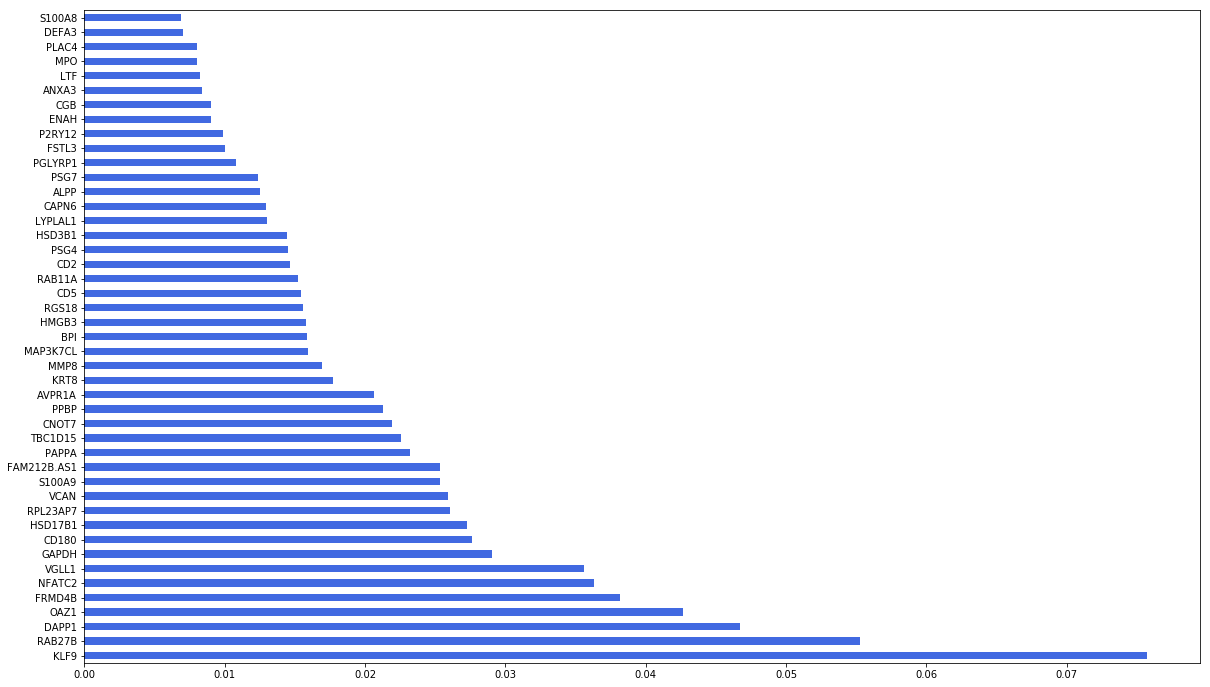

In [96]:
(pd.Series(model2.feature_importances_, index=X2_train_normalized.columns)
   .nlargest(n_features)
   .plot(kind='barh',color="royalblue"))

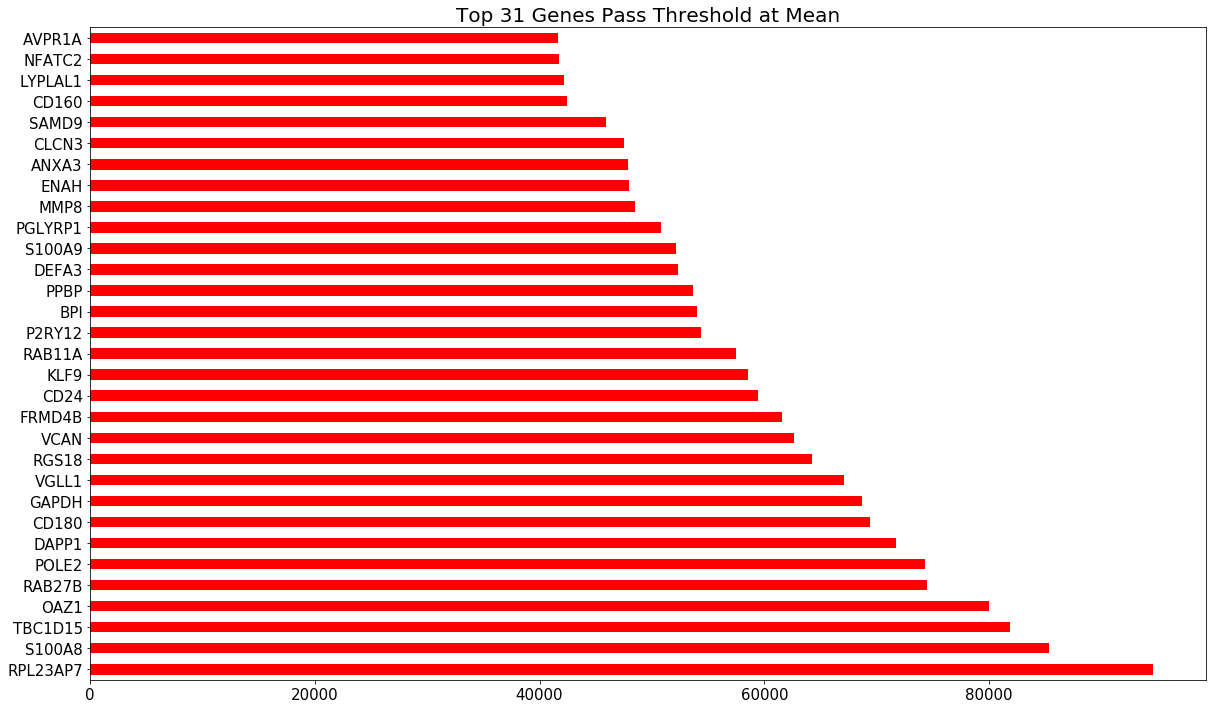

In [97]:
base = pd.Series(0,X2_train_normalized.columns)

for i in range(100000):
    model2 = ExtraTreesClassifier()
    model2.fit(X2_train_normalized,y2_train_classifier)
    sfm = SelectFromModel(model2, prefit = True)
    n_features = sfm.transform(X2_train_normalized).shape[1]
    #print('Number of feature selected:')
    #print(n_features)
    order_features = pd.Series(model2.feature_importances_, index=X2_train_normalized.columns).nlargest(n_features)
    #print(order_features)
    Name_features=pd.Series(1, index=order_features.index)
    
    if i ==0:
        test2use = base.add(Name_features,fill_value=0)
        numFeatures2use = n_features
    else:
        test2use = test2use.add(Name_features,fill_value = 0)
        numFeatures2use = numFeatures2use + n_features

#print(test/1000)
avgnum2use = int(numFeatures2use/100000)

test2use.nlargest(avgnum2use).plot(kind='barh', title = 'Top %i Genes Pass Threshold at Mean'%avgnum2use,color="red",rot=0, fontsize =15).title.set_size(20)

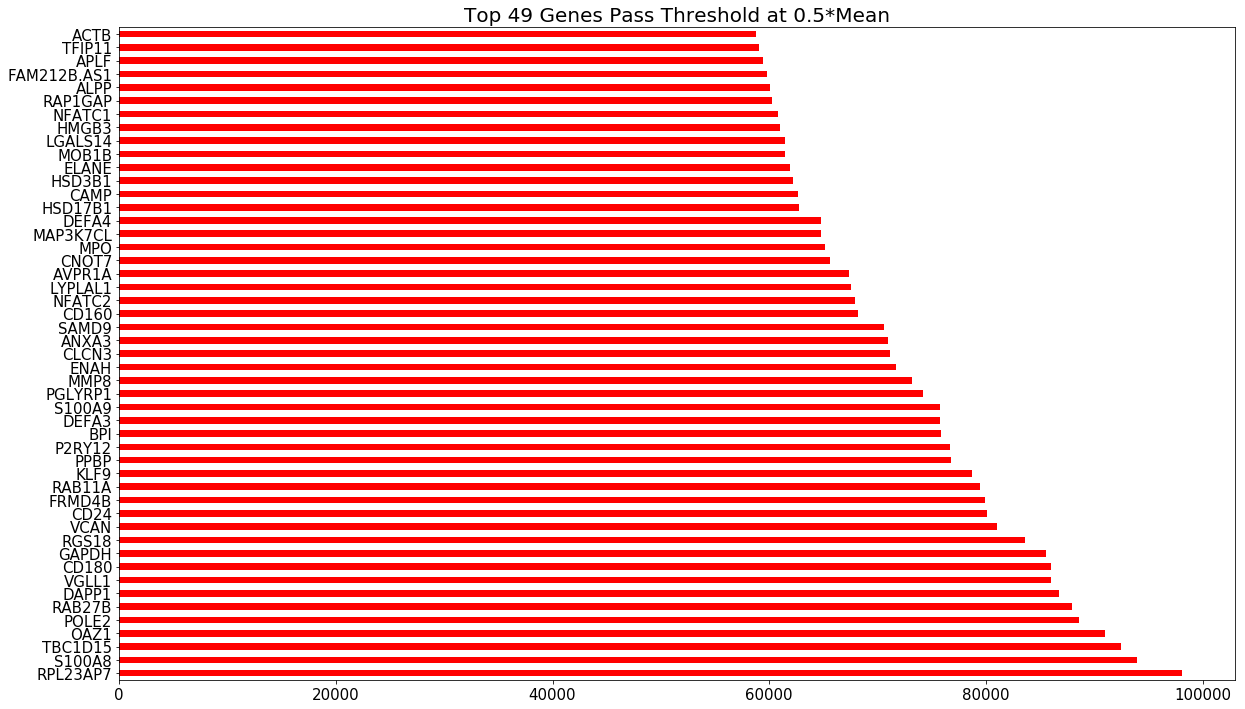

In [110]:
base = pd.Series(0,X2_train_normalized.columns)

for i in range(100000):
    model2 = ExtraTreesClassifier()
    model2.fit(X2_train_normalized,y2_train_classifier)
    sfm = SelectFromModel(model2, prefit = True, threshold = '0.5*mean')
    n_features = sfm.transform(X2_train_normalized).shape[1]
    #print('Number of feature selected:')
    #print(n_features)
    order_features = pd.Series(model2.feature_importances_, index=X2_train_normalized.columns).nlargest(n_features)
    #print(order_features)
    Name_features=pd.Series(1, index=order_features.index)
    
    if i ==0:
        test2use1 = base.add(Name_features,fill_value=0)
        numFeatures2use1 = n_features
    else:
        test2use1 = test2use1.add(Name_features,fill_value = 0)
        numFeatures2use1 = numFeatures2use1 + n_features

#print(test/1000)
avgnum2use1 = int(numFeatures2use1/100000)

test2use1.nlargest(avgnum2use1).plot(kind='barh', title = 'Top %i Genes Pass Threshold at 0.5*Mean'%avgnum2use1,color="red",rot=0, fontsize =15).title.set_size(20)

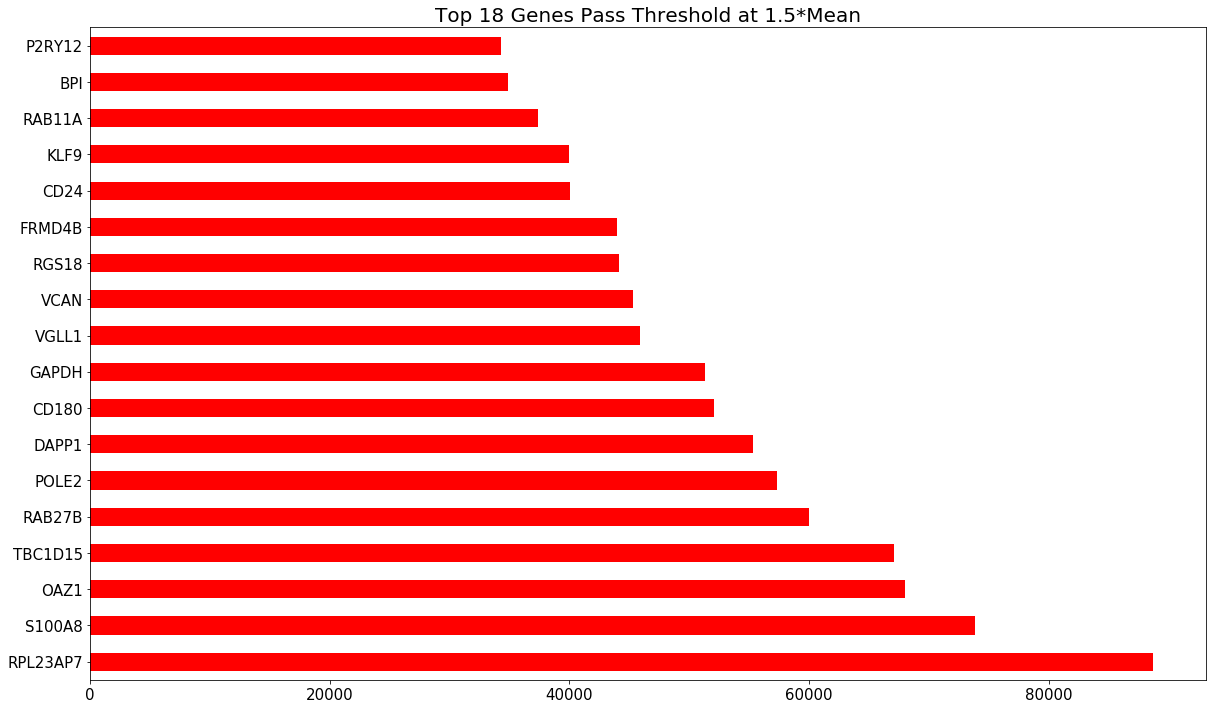

In [99]:
base = pd.Series(0,X2_train_normalized.columns)

for i in range(100000):
    model2 = ExtraTreesClassifier()
    model2.fit(X2_train_normalized,y2_train_classifier)
    sfm = SelectFromModel(model2, prefit = True, threshold = '1.5*mean')
    n_features = sfm.transform(X2_train_normalized).shape[1]
    #print('Number of feature selected:')
    #print(n_features)
    order_features = pd.Series(model2.feature_importances_, index=X2_train_normalized.columns).nlargest(n_features)
    #print(order_features)
    Name_features=pd.Series(1, index=order_features.index)
    
    if i ==0:
        test2 = base.add(Name_features,fill_value=0)
        numFeatures2 = n_features
    else:
        test2 = test2.add(Name_features,fill_value = 0)
        numFeatures2 = numFeatures2 + n_features

#print(test/1000)
avgnum2 = int(numFeatures2/100000)

test2.nlargest(avgnum2).plot(kind='barh', title = 'Top %i Genes Pass Threshold at 1.5*Mean'%avgnum2,color="red",rot=0, fontsize =15).title.set_size(20)

# Grid Search - Decision Tree - Data 2 - RNA Concentration Data

In [111]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree

chosenFeat2=list(test2use1.nlargest(avgnum2use1).index)
X_test2 = X2_train_normalized[chosenFeat2]


dtc = DecisionTreeClassifier(random_state = 1234)

param_grid = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                  'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

grid = GridSearchCV(dtc, param_grid = param_grid, cv = cv, scoring = 'accuracy')

grid.fit(X_test2, y2_train_classifier)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

The best parameters are {'max_depth': 1, 'max_features': 6} with a score of 0.74


# Grid Search - Random Forest - Data 2

In [112]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier


rf = RandomForestClassifier(random_state = 1234)

param_grid = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                  'max_features': ['auto','sqrt'],
              'min_samples_leaf': [1,2,3,4],
               'min_samples_split': [2,5,10], 
               'n_estimators': [1,2,3,4,5,6,7,8,9,10]}

grid = GridSearchCV(rf, param_grid = param_grid, cv = cv, scoring = 'accuracy')

grid.fit(X_test2, y2_train_classifier)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))


The best parameters are {'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 1} with a score of 0.68


# Grid Search- K Nearest Neighbors - Data2

In [113]:
from sklearn.neighbors import KNeighborsClassifier


param_grid = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10],
              'weights': ['uniform','distance'],
                'leaf_size': [1,2,3,5,10,20,30,50,100]}

#Create KNN Classifier
knn = KNeighborsClassifier()



grid = GridSearchCV(knn, param_grid = param_grid, cv = cv, scoring = 'accuracy')

grid.fit(X_test2, y2_train_classifier)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

The best parameters are {'leaf_size': 1, 'n_neighbors': 3, 'weights': 'distance'} with a score of 0.69


In [114]:
# X_test.to_csv("data_1_features.csv")
# X_test2.to_csv("data_2_features.csv")
#X_test2.to_csv("data_2_features_18.csv")
# X_test2.to_csv("data_2_features_49ish.csv")

# Monte Carlo Simulation

In [103]:
#import matplotlib.pyplot as plt

#plt.scatter(X2_train_normalized['MPO']-X2_train_normalized['MMD'] - X2_train_normalized['P2RY12'], y2_train_regressor )
#print(X2_train_normalized['MPO']-X2_train_normalized['MMD'] - X2_train_normalized['P2RY12'], y2_train_regressor)




In [104]:
#import matplotlib.pyplot as plt
#import numpy as np
#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import  explained_variance_score
#import pymc

#parms = pymc.Uniform('parms', lower=0, upper=3000)
#intercept = pymc.Uniform('intercept',  lower=0, upper=1000)
#x = pymc.Normal('x', mu=0, tau=1, value=X2_train_normalized['MPO']-X2_train_normalized['MMD'] - X2_train_normalized['P2RY12'], observed=True)
#@pymc.deterministic(plot=False)
#def linear_regress(x=x, parms=parms, intercept=intercept):
#    return x*parms+intercept

#y = pymc.Normal('output', mu=linear_regress, value=y2_train_regressor, observed=True)
#model = pymc.Model([x, y, parms, intercept])
#mcmc = pymc.MCMC(model)
#mcmc.sample(iter=30000, burn=1000, thin=10)
# x = np.arange(-0.1,.1,.01)

# plt.scatter(X2_train_normalized['MPO']-X2_train_normalized['MMD'] - X2_train_normalized['P2RY12'], y2_train_regressor )

# for i in range(len(mcmc.trace('parms')[:])):
#     plt.plot(x, mcmc.trace('parms')[:][i]*x+mcmc.trace('intercept')[:][i], 'r', alpha=0.05)
# plt.show()